In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm
from scipy.stats import spearmanr
import numpy as np
import pandas as pd
import deconomix

In [2]:
X_ref = pd.read_pickle("../Test/B05a_X_ref.pkl").astype(np.float64)
gamma = pd.read_pickle("../Test/gamma.pkl")
tcga_bulks = pd.read_pickle("../Test/tcga_conv_norm.pkl").astype(np.float64)
tcga_subtypes = pd.read_csv("../Test/tcga_subtype.csv").values.flatten()


In [3]:
tcga_LumA = tcga_bulks.iloc[:, tcga_subtypes == "LumA"]
tcga_LumB = tcga_bulks.iloc[:, tcga_subtypes == "LumB"]
tcga_Her2 = tcga_bulks.iloc[:, tcga_subtypes == "Her2"]
tcga_Basal = tcga_bulks.iloc[:, tcga_subtypes == "Basal"]

In [4]:
model_HPS_LumA = deconomix.hps.HPS(X_ref, tcga_LumA)
model_HPS_LumA.run(n_workers=50)
model_HPS_LumA.results.to_pickle('HPS_LumA_results.pkl')

model_HPS_LumB = deconomix.hps.HPS(X_ref, tcga_LumB)
model_HPS_LumB.run(n_workers=50)
model_HPS_LumB.results.to_pickle('HPS_LumB_results.pkl')

model_HPS_Her2 = deconomix.hps.HPS(X_ref, tcga_Her2)
model_HPS_Her2.run(n_workers=50)
model_HPS_Her2.results.to_pickle('HPS_Her2_results.pkl')

model_HPS_Basal = deconomix.hps.HPS(X_ref, tcga_Basal)
model_HPS_Basal.run(n_workers=50)
model_HPS_Basal.results.to_pickle('HPS_Basal_results.pkl')


Preparing Job List
Preparing Baseline Model


Running jobs: 100%|██████████| 105/105 [16:25<00:00,  9.39s/it] 


Preparing Job List
Preparing Baseline Model


Running jobs: 100%|██████████| 105/105 [14:42<00:00,  8.41s/it] 


Preparing Job List
Preparing Baseline Model


Running jobs: 100%|██████████| 105/105 [10:39<00:00,  6.09s/it] 


Preparing Job List
Preparing Baseline Model


Running jobs: 100%|██████████| 105/105 [15:58<00:00,  9.13s/it] 


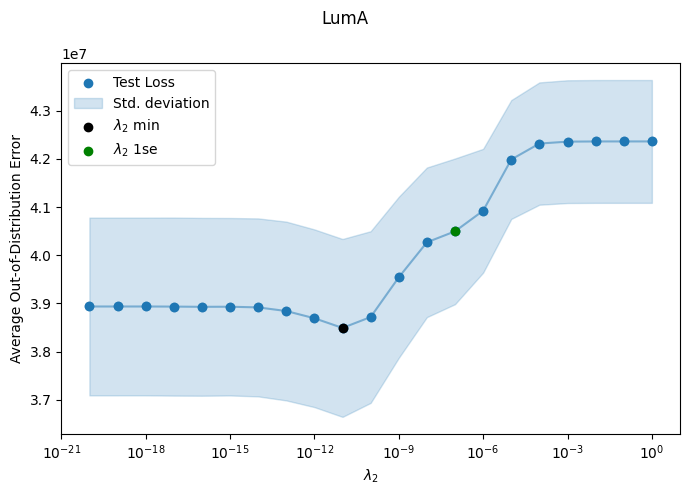

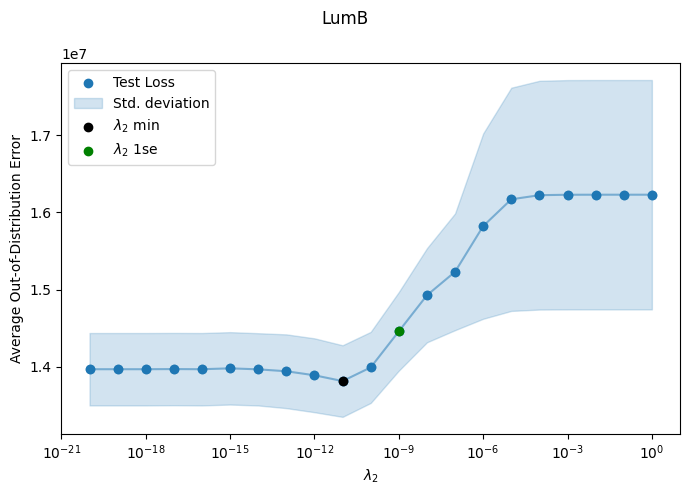

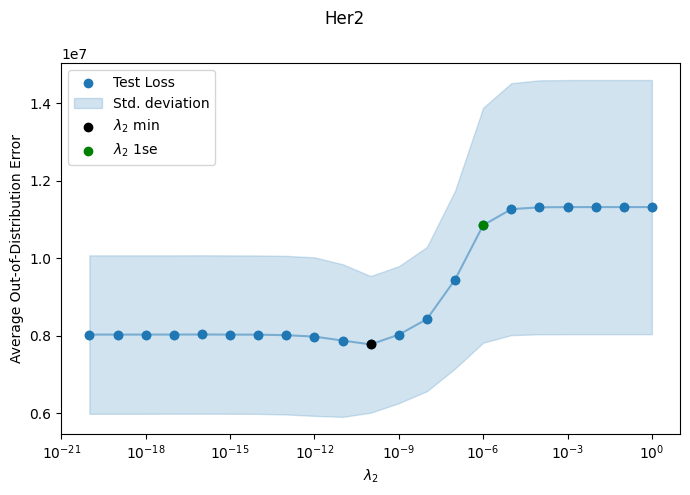

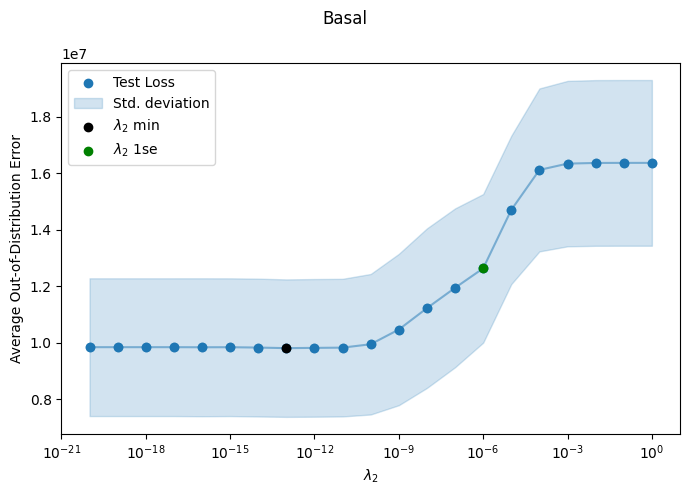

In [5]:
results_LumA = pd.read_pickle('HPS_LumA_results.pkl')
results_LumB = pd.read_pickle('HPS_LumB_results.pkl')
results_Her2 = pd.read_pickle('HPS_Her2_results.pkl')
results_Basal = pd.read_pickle('HPS_Basal_results.pkl')

deconomix.hps.plot_results(results_LumA, title='LumA', path='HPS_LumA_results.png')
deconomix.hps.plot_results(results_LumB, title='LumB', path='HPS_LumB_results.png')
deconomix.hps.plot_results(results_Her2, title='Her2', path='HPS_Her2_results.png')
deconomix.hps.plot_results(results_Basal, title='Basal', path='HPS_Basal_results.png')
